# Commits and authors

In [22]:
import pandas as pd
data = pd.read_csv("data/commits.csv", index_col = 0)
from ipywidgets import interact, widgets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


In [11]:
data

,id,author_name,commiter,commit_date,project,deletions,insertions,message,type
0,f41959ccb2d9d4c722fe8fc3351401d53bcf4900,Manjunath Kudlur,<pydriller.domain.developer.Developer object a...,2015-11-06 16:27:58-08:00,tensorflow,0,391534,TensorFlow: Initial commit of TensorFlow libra...,current
1,cd9e60c1cd8afef6e39b4b73525d64aee33b656b,Manjunath Kudlur,<pydriller.domain.developer.Developer object a...,2015-11-06 18:37:11-08:00,tensorflow,914,1245,TensorFlow: Upstream latest changes to Git.\n\...,current
2,8bd3b38e662a1298bebcada676c7cc6e2ea49c0f,Vijay Vasudevan,<pydriller.domain.developer.Developer object a...,2015-11-06 21:57:38-08:00,tensorflow,160,4223,TensorFlow: Upstream changes to git.\n\nChange...,current
3,7de9099a739c9dc62b1ca55c1eeef90acbfa7be9,Vijay Vasudevan,<pydriller.domain.developer.Developer object a...,2015-11-07 10:49:41-08:00,tensorflow,94,242,TensorFlow: Upstream latest commits to git.\n\...,current
4,fddaed524622417900d745fe8f115562c55ac49a,Vijay Vasudevan,<pydriller.domain.developer.Developer object a...,2015-11-07 13:58:24-08:00,tensorflow,2015,2076,TensorFlow: Upstream commits to git.\n\nChange...,current
...,...,...,...,...,...,...,...,...,...
8261,479fc3f7059b6188ec1aece0d0e00b8f372bac6d,Massimo Di Pierro,<pydriller.domain.developer.Developer object a...,2023-03-22 21:37:28-07:00,web2py,22,64,Merge branch 'master' of github.com:web2py/web2py,legacy
8262,7685d373474378e93132f8916145fb11f84cec71,Massimo Di Pierro,<pydriller.domain.developer.Developer object a...,2023-03-22 21:39:42-07:00,web2py,2,2,version 2.24.1,legacy
8263,b9a73402d81d3c7483decce4643c4fb29ea979f6,Leonel Câmara,<pydriller.domain.developer.Developer object a...,2023-06-05 12:00:35+01:00,web2py,1,1,Fix password reset link staying active after p...,legacy
8264,70dd3a950b3517a1e31741a2eebfa85874085686,Kory Prince,<pydriller.domain.developer.Developer object a...,2023-07-04 21:45:40-05:00,web2py,4,10,sanitize CRLF in headers to prevent HTTP respo...,legacy


In [12]:
data['commit_date'] = pd.to_datetime(data['commit_date'],utc=True)
data['commit_date'] = data['commit_date'].dt.date
data['commit_date'] = pd.to_datetime(data['commit_date'], format='%Y-%m-%d')

In [13]:
filtered = data[data['project'].isin(['junit4','junit5'])]
filtered.head()

,id,author_name,commiter,commit_date,project,deletions,insertions,message,type
577500,92c14e9cec7862254d06019043d081d4e8c64789,Marc Philipp,<pydriller.domain.developer.Developer object a...,2015-06-04,junit5,0,37,Initial project setup,current
577501,4545a251deebdf12255cdf769651e08d9441962f,Marc Philipp,<pydriller.domain.developer.Developer object a...,2015-06-04,junit5,0,212,"Add license, contributing info, and readme",current
577502,df853f3f7a35a7cfbde12af7c1b1bc0b27d26f11,Marc Philipp,<pydriller.domain.developer.Developer object a...,2015-06-04,junit5,0,4,Configure Travis,current
577503,dbd62694c8f725ea7d93134d9b8d314ed74ce8ea,Marc Philipp,<pydriller.domain.developer.Developer object a...,2015-09-07,junit5,0,0,Initial Home page,current
577504,ee1ef35b795f147cbaee73b2f36cba00eb72bde6,Sam Brannen,<pydriller.domain.developer.Developer object a...,2015-10-23,junit5,2,17,"Update .gitignore for Gradle, Eclipse, Intelli...",current


In [16]:
author_project_by_month = filtered.set_index(['commit_date','project'])
author_project_by_month = author_project_by_month.groupby([pd.Grouper(level='project'),
                                                           pd.Grouper(freq='M', level='commit_date')]).nunique()
author_project_by_month.head()

id  author_name  commiter  deletions  insertions  \
project commit_date                                                     
junit4  2000-12-31    6            1         3          5           5   
        2001-01-31    6            1         2          6           6   
        2001-04-30    2            1         1          2           2   
        2001-05-31    2            1         1          2           2   
        2001-07-31    4            1         2          1           3   

                     message  type  
project commit_date                 
junit4  2000-12-31         6     1  
        2001-01-31         6     1  
        2001-04-30         2     1  
        2001-05-31         2     1  
        2001-07-31         4     1

interactive(children=(SelectMultiple(description='Projects', options=('tensorflow', 'pytorch', 'django', 'flas…

<function __main__.plot_author_trends(project_list, start_date, end_date)>

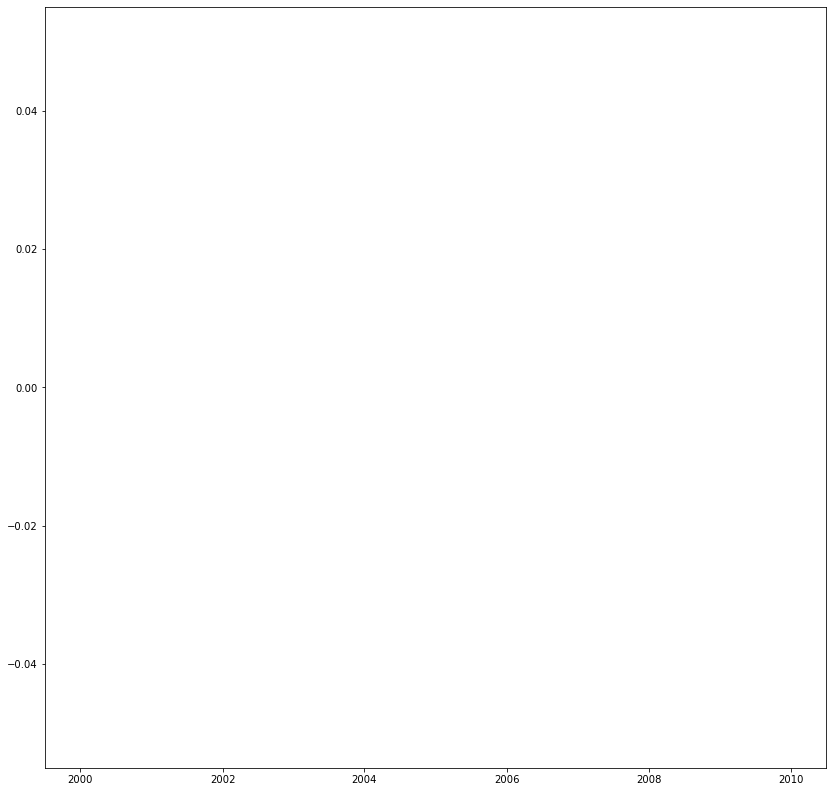

In [26]:
#settings
chart_width=14
chart_height=7
chart_fontsize=16
chart_width_square=7
chart_height_square=7
chart_fontsize_square=12
ema_short=12
ema_long=24
linestyle_absolute='dotted'
linewidth_ema=3.5

def plot_author_trends(project_list, start_date, end_date):
    plt.figure(figsize=(chart_width, chart_width))
    
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    for project in project_list:
        contributors = author_project_by_month[author_project_by_month.index.get_level_values('project') == project]
        contributors = contributors[(contributors.index.get_level_values('commit_date') >= start_date) 
                        & (contributors.index.get_level_values('commit_date') <= end_date)]
        contributors['ema_short'] = contributors['author_name'].ewm(span=ema_short).mean()
        contributors['ema_long'] = contributors['author_name'].ewm(span=ema_long).mean()
        plt.plot(contributors.index.get_level_values('commit_date'), contributors['author_name'], label=f'{project}: # authors',linestyle=linestyle_absolute)
        plt.plot(contributors.index.get_level_values('commit_date'), contributors['ema_short'], label=f'{project}: EMA-{ema_short}', linewidth=linewidth_ema)
        plt.plot(contributors.index.get_level_values('commit_date'), contributors['ema_long'], label=f'{project}: EMA-{ema_long}', linewidth=linewidth_ema)
        
        if contributors['ema_short'].iloc[-1] > contributors['ema_long'].iloc[-1]:
            print(f'{project}\'s lifecycle is on a high trend for authors.')
        else:
            print(f'{project}\'s lifecycle is on a low trend for authors.')
                        
        print(f'EMA_short-term = {contributors["ema_short"].iloc[-1]}')
        print(f'EMA_long-term = {contributors["ema_long"].iloc[-1]}')
        
    #plt.xlabel('Date')
    plt.ylabel('Authors',fontsize=chart_fontsize)
    #plt.title('Author trends')
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.xticks(rotation=90,fontsize=chart_fontsize-2)
    plt.yticks(fontsize=chart_fontsize)
    plt.legend(fontsize=chart_fontsize)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.tight_layout()
    plt.show()

project_options = data['project'].unique()
project_selector = widgets.SelectMultiple(options=project_options,description='Projects')
start_date_picker = widgets.DatePicker(value=author_project_by_month.index.get_level_values('commit_date').min(),description='Start date')
end_date_picker = widgets.DatePicker(value=author_project_by_month.index.get_level_values('commit_date').max(),description='End date')

interact(plot_author_trends, project_list=project_selector, start_date=start_date_picker, end_date=end_date_picker)

In [10]:
filtered['commit_date'] = pd.to_datetime(filtered['commit_date'], format='%Y-%m-%d')
filtered.head()

/tmp/ipykernel_187789/3577683292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['commit_date'] = pd.to_datetime(filtered['commit_date'], format='%Y-%m-%d')


,id,author_name,commiter,commit_date,project,deletions,insertions,message,type
577500,92c14e9cec7862254d06019043d081d4e8c64789,Marc Philipp,<pydriller.domain.developer.Developer object a...,2015-06-04 15:33:07+02:00,junit5,0,37,Initial project setup,current
577501,4545a251deebdf12255cdf769651e08d9441962f,Marc Philipp,<pydriller.domain.developer.Developer object a...,2015-06-04 15:39:48+02:00,junit5,0,212,"Add license, contributing info, and readme",current
577502,df853f3f7a35a7cfbde12af7c1b1bc0b27d26f11,Marc Philipp,<pydriller.domain.developer.Developer object a...,2015-06-04 15:44:08+02:00,junit5,0,4,Configure Travis,current
577503,dbd62694c8f725ea7d93134d9b8d314ed74ce8ea,Marc Philipp,<pydriller.domain.developer.Developer object a...,2015-09-07 14:40:16+02:00,junit5,0,0,Initial Home page,current
577504,ee1ef35b795f147cbaee73b2f36cba00eb72bde6,Sam Brannen,<pydriller.domain.developer.Developer object a...,2015-10-23 14:28:19+02:00,junit5,2,17,"Update .gitignore for Gradle, Eclipse, Intelli...",current


In [8]:
author_by_month = filtered.set_index(['commit_date','project'])
author_by_month = author_by_month.groupby([pd.Grouper(level='project'),
                                                           pd.Grouper(freq='M', level='commit_date')]).unique()
author_by_month.head()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

# Visualization: commits/authors over time

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from ipywidgets import interact, widgets

data["commit_date"] = pd.to_datetime(data["commit_date"], format="%Y-%m-%d")
data = data.sort_values(by=['project', 'commit_date'])

# Função para atualizar o gráfico com base nos projetos selecionados.
def update_plot(project_list):
    plt.figure(figsize=(10, 5))

    for project in project_list:
        view = data[data["project"] == project]
        plt.plot(view['commit_date'], view['smoothed_qt_commit'], linestyle='-', label=f"{project} commits")
        plt.plot(view['commit_date'], view['smoothed_qt_author'], linestyle='--', label=f"{project} authors")

    plt.xlabel('Data')
    plt.ylabel('Quantidade')
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.title('Quantidade de Commits/Authors ao longo do Tempo')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Lista de todos os projetos disponíveis.
project_options = data['project'].unique()

# Converte o numpy.ndarray em uma tupla.
initial_value = tuple(project_options)

# Cria um controle de seleção múltipla para escolher os projetos.
project_selector = widgets.SelectMultiple(
    options=project_options,
    value=initial_value,
    description='Projetos'
)

# Cria um controle interativo para atualizar o gráfico.
interact(update_plot, project_list=project_selector)


interactive(children=(SelectMultiple(description='Projetos', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, …

<function __main__.update_plot(project_list)>

In [ ]:
def plot_author_trends(project_list, start_date, end_date):
    plt.figure(figsize=(chart_width, chart_height))
    
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    for project in project_list:
        contributors = commit_project_by_month[commit_project_by_month.index.get_level_values('project') == project]
        contributors = contributors[(contributors.index.get_level_values('commit_date') >= start_date) 
                        & (contributors.index.get_level_values('commit_date') <= end_date)]
        contributors['ema_short'] = contributors['qt_author'].ewm(span=ema_short).mean()
        contributors['ema_long'] = contributors['qt_author'].ewm(span=ema_long).mean()
        plt.plot(contributors.index.get_level_values('commit_date'), contributors['qt_author'], label=f'{project}: # contributors',linestyle=linestyle_absolute)
        plt.plot(contributors.index.get_level_values('commit_date'), contributors['ema_short'], label=f'{project}: EMA-{ema_short}', linewidth=linewidth_ema)
        plt.plot(contributors.index.get_level_values('commit_date'), contributors['ema_long'], label=f'{project}: EMA-{ema_long}', linewidth=linewidth_ema)
        
        if contributors['ema_short'].iloc[-1] > contributors['ema_long'].iloc[-1]:
            print(f'{project}\'s lifecycle is on a high trend for authors.')
        else:
            print(f'{project}\'s lifecycle is on a low trend for authors.')
                        
        print(f'EMA_short-term = {contributors["ema_short"].iloc[-1]}')
        print(f'EMA_long-term = {contributors["ema_long"].iloc[-1]}')
        
    #plt.xlabel('Date')
    plt.ylabel('Authors',fontsize=chart_fontsize)
    #plt.title('Author trends')
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.xticks(rotation=90,fontsize=chart_fontsize)
    plt.yticks(fontsize=chart_fontsize)
    plt.legend(fontsize=chart_fontsize)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.tight_layout()
    plt.show()

project_options = data['project'].unique()
project_selector = widgets.SelectMultiple(options=project_options,description='Projects')
start_date_picker = widgets.DatePicker(value=data['commit_date'].min(),description='Start date')
end_date_picker = widgets.DatePicker(value=data['commit_date'].max(),description='End date')

interact(plot_author_trends, project_list=project_selector, start_date=start_date_picker, end_date=end_date_picker)